In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [3]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

# (a) Preferential attachment network (n=1000)

In [4]:
g2<- barabasi.game(1000,m=1,directed=F)

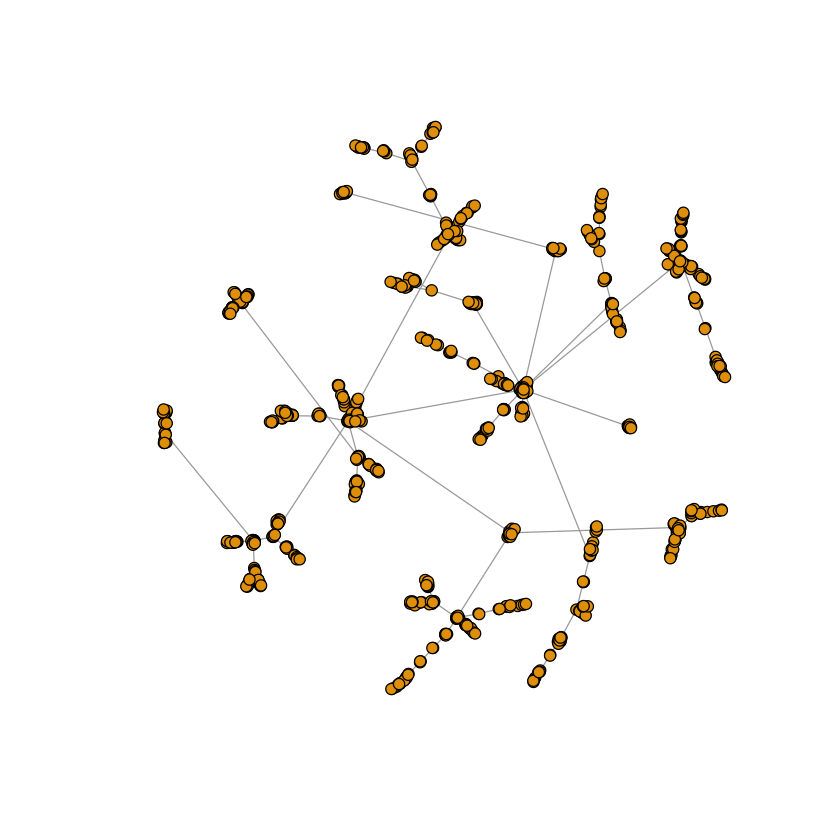

In [21]:
plot(g2,vertex.size=4, vertex.label=NA)

# (b)&(c) Random Walk on Preferential Attachement Network (n=1000)

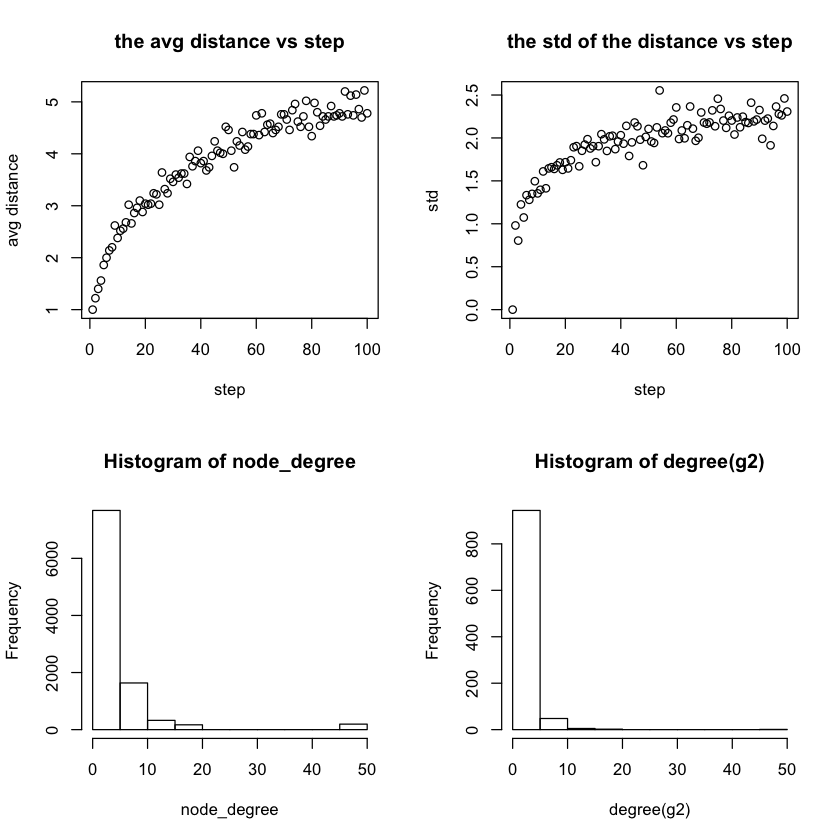

In [9]:
set.seed(0)
start_node = sample(1:vcount(g2), 100)
l = c()
s_t.mean = c()
s_t.sd = c()
node_degree = c()

for (steps in 1:100) {
    for (i in 1:100){
        v_last = random_walk(g2, steps, start_node[i])
        shortpath = distances(g2, start_node[i], v_last)
        l <- append(l, shortpath)
        node_degree <- append(node_degree, degree(g2, v_last))
    }
    s_t.mean <- append(s_t.mean, mean(l))
    s_t.sd <- append(s_t.sd, sd(l))
    l = c()
}

layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
hist(node_degree)
hist(degree(g2))

# (d) Preferential Attachment Network Generation (n=100 & 10000)

In [28]:
g3<- barabasi.game(100,m=1,directed=F)

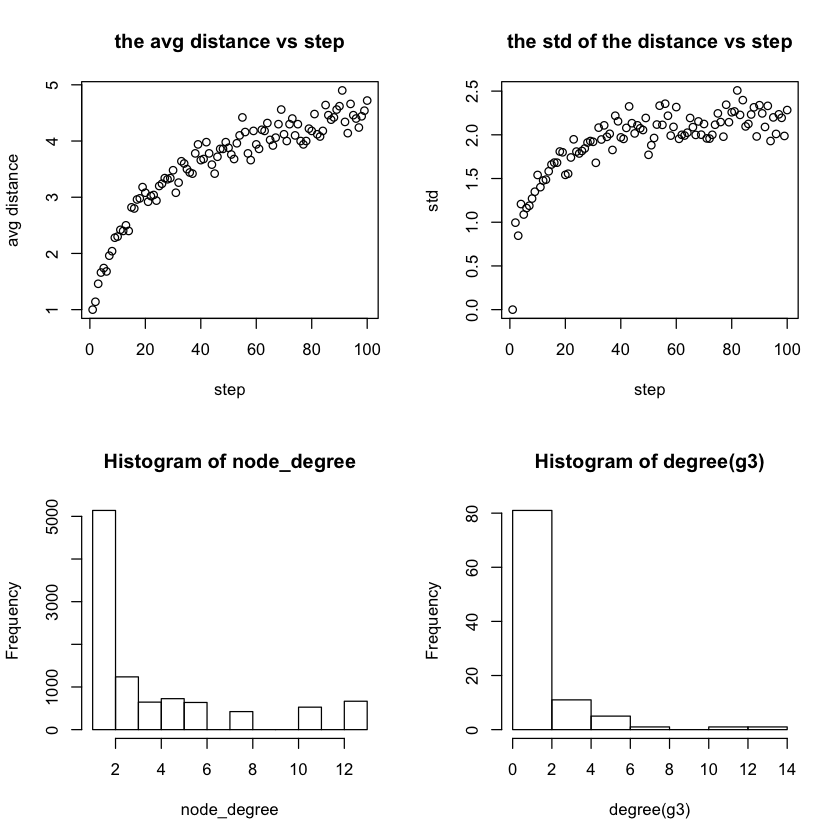

In [29]:
set.seed(0)
start_node = sample(1:vcount(g3), 100)
l = c()
s_t.mean = c()
s_t.sd = c()
node_degree = c()

for (steps in 1:100) {
    for (i in 1:100){
        v_last = random_walk(g3, steps, start_node[i])
        shortpath = distances(g3, start_node[i], v_last)
        l <- append(l, shortpath)
        node_degree <- append(node_degree, degree(g3, v_last))
    }
    s_t.mean <- append(s_t.mean, mean(l))
    s_t.sd <- append(s_t.sd, sd(l))
    l = c()
}

layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
hist(node_degree)
hist(degree(g3))

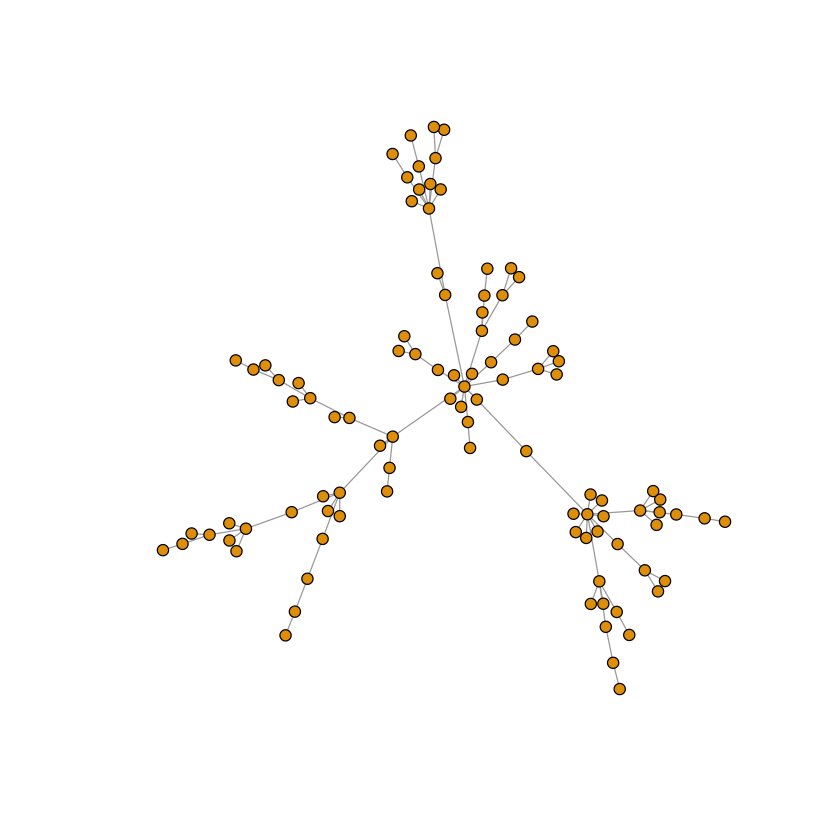

In [30]:
plot(g3,vertex.size=4, vertex.label=NA)

In [31]:
diameter(g3)

[1] 13

In [3]:
g4<- barabasi.game(10000,m=1,directed=F)

In [14]:
graph_rw2 = function (graph){
    
    start_node = sample(1:vcount(graph), 30)
    l = c()
    s_t.mean = c()
    s_t.sd = c()
    node_degree = c()
    
    for (steps in 1:100) {
        for (i in 1:30){
            v_last = random_walk(graph, steps, start_node[i])
            shortpath = distances(graph, start_node[i], v_last)
            l <- append(l, shortpath)
            node_degree <- append(node_degree, degree(graph, v_last))
        }
        s_t.mean <- append(s_t.mean, mean(l))
        s_t.sd <- append(s_t.sd, sd(l))
        l = c()
    }
    
    layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
    plot(s_t.mean, main="the avg distance vs step",xlab="step",ylab="avg distance")
    plot(s_t.sd, main="the std of the distance vs step",xlab="step",ylab="std")
    hist(node_degree)
    hist(degree(graph))
}

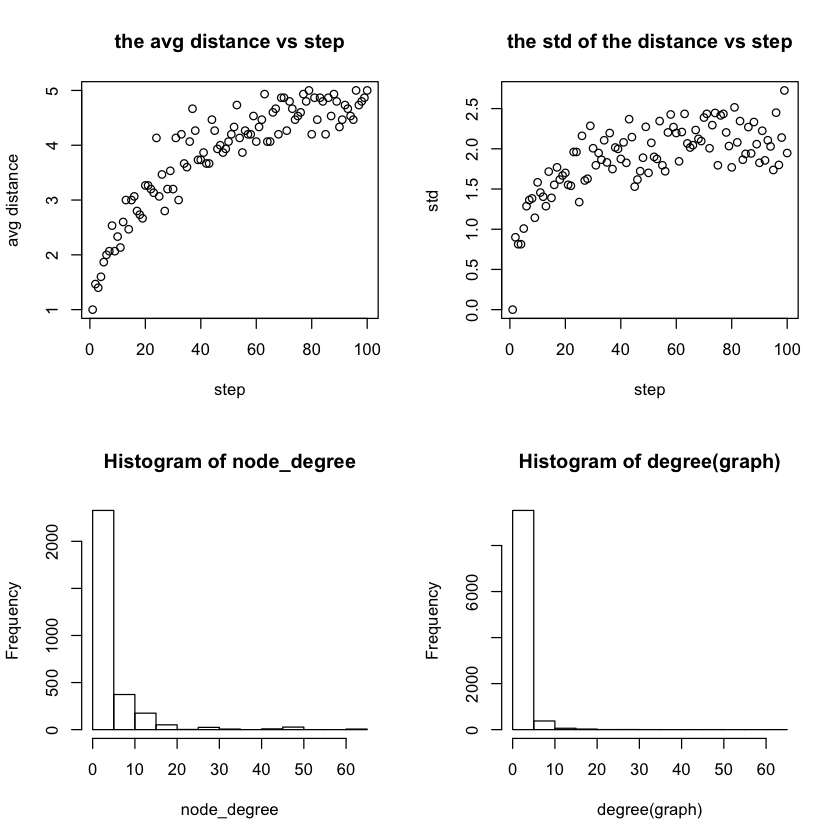

In [15]:
set.seed(0)
graph_rw2(g4)

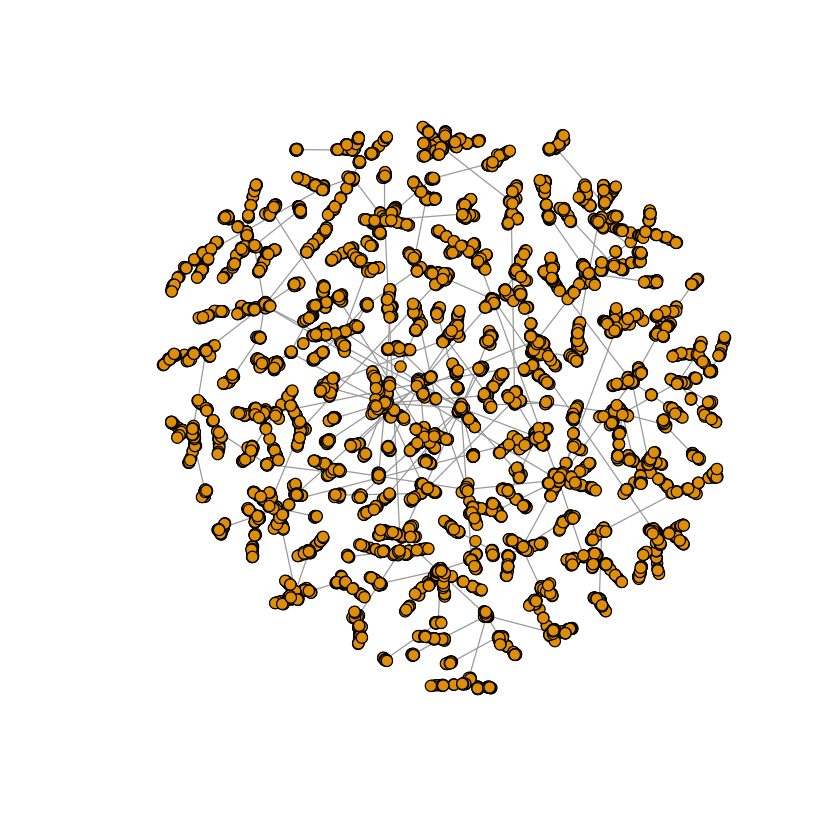

In [20]:
plot(g4,vertex.size=4, vertex.label=NA)

In [4]:
diameter(g4)

[1] 30